<h1 align="center">Python performance exercises</h1>

## Python best practices exercises

### Exercise 1

considering the following function for concatenating list strings with delimiter.

In [137]:
def ft_concatenate(l_strings, d):
    """concatenate list of strings into one string separated by delimiter"""
    res = l_strings[0]
    for e in l_strings[1:]:
        res = res + d + e
    return res

print(ft_concatenate("Bonjour", ";"))

B;o;n;j;o;u;r


- profile the function and identify the bottlenecks.
- improve speed up of the function
*Hint: you may need to look to the string functions in python documentation*

In [177]:
# write your code here
def ft_concatenate_string(l_string,d):
    return str(d).join(l_string)
ft_concatenate_string("Teacher",":")

'T:e:a:c:h:e:r'

### Exercise 2

In this exercise you will solve the following problem using two methods bruteforce method, and fast method.

**Problem:** You are given a list of n integers, and your task is to calculate the number of distinct values in the list.

**Example**
- Input:
5
2 3 2 2 3

- Output:
2

**Implement the following methods:**

1. **bruteforce method:** create an empty list and start adding items for the given list without adding the previous item add, at the end the result list will contain unique values, print lenght of the list and you are done. 
2. **fast method** think of using Set data structure.

- time the two methods, what do you think?

In [189]:
# bruteforce method


def Unique(L_ist):
    List_unique = []
    List_unique.append(L[0])
    for i in L[1:]:
        k = 0
        a = i
        for j in range(len(List_unique)):
            if a == List_unique[j]:
                k+=1
        if k == 0:
            List_unique.append(a)

    return List_unique

Unique([2,4,5,4,2,6,9,5,3])

[2, 4, 5, 3, 7, 6, 9, 8, 1]

In [187]:
# fast method
import numpy as np
def F_Unique(L_ist):
    L = np.unique(L_ist)
    return L

array([2, 3, 4, 5, 6, 9])

In [197]:
# Create a random list of numbers for testing

L = np.random.randint(1,10, 20)
print(L)
print(" ")
print(Unique(L))
print(" ")
print(F_Unique(L))


# time the two methods

# Bruteforce method
U_start_time = time.perf_counter()
Unique(L)
U_end_time = time.perf_counter()
print(f"Start_time :{U_start_time}")
print(f"End_time : {U_end_time}")
print(f"Bruteforce`s Execution time : {U_end_time - U_start_time}")
print("")

# Fast method
F_start_time = time.perf_counter()
F_Unique(L)
F_end_time = time.perf_counter()
print(f"Start_time :{F_start_time}")
print(f"End_time : {F_end_time}")
print(f"Fast`s Execution time : {F_end_time - F_start_time}")



[1 4 8 1 8 4 1 6 2 5 2 9 5 1 4 9 7 7 6 5]
 
[1, 4, 8, 6, 2, 5, 9, 7]
 
[1 2 4 5 6 7 8 9]
Start_time :275453.6286582
End_time : 275453.6288843
Bruteforce`s Execution time : 0.00022610003361478448

Start_time :275453.6293521
End_time : 275453.6295593
Fast`s Execution time : 0.0002072000061161816


## Cython exercises

### Exercise 1

1. load the cython extension.

In [2]:
import cython

2. Considering the following polynomial function:

In [3]:
def poly(a,b):
    return 10.5 * a + 3 * (b**2)

- Create an equivalent Cython function of `poly` with name `poly_cy`.

In [4]:
@cython.cfunc
def poly_cy(a:cython.float, b:cython.float):
    return 10.5 * a + 3 * (b**2)

poly_cy(2,3)

48.0

3. time the performance of Python and Cython version of the function, what is the factor of speed up between the two verions.

In [8]:
import time

#Pure python execution time
Py_start_time = time.perf_counter()
poly(2,3)
Py_end_time = time.perf_counter()
print(f"Start_time :{Py_start_time}")
print(f"End_time : {Py_end_time}")
print(f"Pure python`s Execution time : {Py_end_time - Py_start_time}")
print()

#Cython execution time
Cy_start_time = time.perf_counter()
poly_cy(2,3)
Cy_end_time = time.perf_counter()
print(f"Start_time :{Cy_start_time}")
print(f"End_time : {Cy_end_time}")
print(f"Cython`s Execution time : {Cy_end_time - Cy_start_time}")



Start_time :223098.7882809
End_time : 223098.7885055
Pure python`s Execution time : 0.00022460002219304442

Start_time :223098.7892768
End_time : 223098.7894084
Cython`s Execution time : 0.00013160001253709197


4. Now let's work on another example using loop.
    - rewrite the same function below fib that calculates the fibonacci sequence using cython, but now try to add type for the variables used inside it, add a prefix `_cy` to your new cython function.

In [9]:
def fib(n):
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a

    return a

In [10]:
@cython.cfunc

def fib_cy(n:cython.int):
    a:cython.int
    b:cython.int
    a,b = 1, 1
    for i in range(n):
        a, b = a + b, a

    return a

- time the two function for fibonacci series, with n = 20, what is the factor of speed now, What do you think?

In [11]:
P_start = time.perf_counter()
fib(20)
P_end = time.perf_counter()
print(f"Fib with python execution time: {P_end-P_start}")

print()

C_start = time.perf_counter()
fib_cy(20)
C_end = time.perf_counter()
print(f"Fib with cython execution time: {C_end-C_start}")

Fib with python execution time: 0.00019779999274760485

Fib with cython execution time: 0.00017949999892152846


5. Recursive functions are functions that call themselves during their execution. Another interesting property of the Fibonacci sequence is that it can be written as a recursive function. That’s because each item depends on the values of other items (namely item n-1 and item n-2)

- Rewrite the fib function using recursion. Is it faster than the non-recursive version? Does Cythonizing it give even more of an advantage? 

In [12]:
def fibonacci(N):
    if N == 0:
        return 0

    elif N == 1:
        return 1

    return fibonacci(N - 1) + fibonacci(N - 2)


### Exercise 2

- Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 
- One of the basic examples of getting started with the Monte Carlo algorithm is the estimation of Pi.

**Estimation of Pi**

- The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. 
- Imagine a circle inside the same domain with same diameter and inscribed into the square. 
- We then calculate the ratio of number points that lied inside the circle and total number of generated points. 
- Refer to the image below:

![demo](../data/MonteCarloPlot.png)

We know that area of the square is 1 unit sq while that of circle is $\pi \ast  (\frac{1}{2})^{2} = \frac{\pi}{4}$. Now for a very large number of generated points,

![demo](../data/MonteCarloCalc.png)


## The Algorithm

1. Initialize cile_points, square_points and interval to 0.
2. Generate random point x.
3. Generate random point y.
4. Calculate d = x*x + y*y.
5. If d <= 1, increment circle_points.
6. Increment square_points.
7. Increment interval.
8. If increment < NO_OF_ITERATIONS, repeat from 2.
9. Calculate pi = 4*(circle_points/square_points).
10. Terminate.

**Your mission:** time the function `monte_carlo_pi`, identify the bottlenecks and create a new version using cython functionality to speed up monte carlo simulation for PI, use 100,000 points and compare the speed up factor between python and cython, considering the following optimizations:
- add type for variables used.
- add type for the function
- use c rand function instead of python rand function.
 
*Hint: you can import function from C libraries using the following approach `from libc.<name of c library> cimport <library function name>`, replace the holders `<>` with the right identities for the current problem*

In [13]:
import random
def monte_carlo_pi(nsamples):
    pi = 0.
    circle_points = 0
    square_points = 0
    incre_interval = 0
    while incre_interval < nsamples:
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        d = x**2 + y**2
        if d <= 1:
            circle_points += 1
            square_points += 1
        elif d >= 1:
            square_points += 1
        incre_interval += 1    
    pi = 4*(circle_points/square_points)
    return pi

CarloPy_start_time = time.perf_counter()
monte_carlo_pi(100000)
CarloPy_end_time = time.perf_counter()
print(f"Start_time :{CarloPy_start_time}")
print(f"End_time : {CarloPy_end_time}")
print(f"Pure python`s Execution time : {CarloPy_end_time - CarloPy_start_time}")
print()

Start_time :223138.429376
End_time : 223138.9414069
Pure python`s Execution time : 0.5120309000194538



In [119]:


def TimePy():
    CarloPy_start_time = time.perf_counter()
    monte_carlo_pi(1000)
    CarloPy_end_time = time.perf_counter()

    return CarloPy_end_time - CarloPy_start_time

### Cython equivalent of the previous code

In [120]:
import random


@cython.cfunc

def monte_carlo_pi_cy(nsamples:cython.int):
    pi:cython.double
    circle_points:cython.int 
    square_points:cython.int
    incre_interval:cython.int
    x:cython.double
    y:cython.double
    d:cython.double
    pi = 0.
    circle_points = 0
    square_points = 0
    incre_interval = 0

    while incre_interval < nsamples:
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        d = x**2 + y**2
        if d <= 1:
            circle_points += 1
            square_points += 1
        elif d >= 1:
            square_points += 1
        incre_interval += 1

    pi = 4.0 * (circle_points / square_points)
    return pi
CarloCy_start_time = time.perf_counter()
monte_carlo_pi_cy(100000)
CarloCy_end_time = time.perf_counter()
print(f"Start_time :{CarloCy_start_time}")
print(f"End_time : {CarloCy_end_time}")
print(f"Cython`s Execution time : {CarloCy_end_time - CarloCy_start_time}")
print()

Start_time :226146.1851419
End_time : 226146.673718
Cython`s Execution time : 0.4885761000041384



In [121]:
def TimeCy():
    CarloCy_start_time = time.perf_counter()
    monte_carlo_pi(1000)
    CarloCy_end_time = time.perf_counter()
    return CarloCy_end_time - CarloCy_start_time


## Comparison

100 100


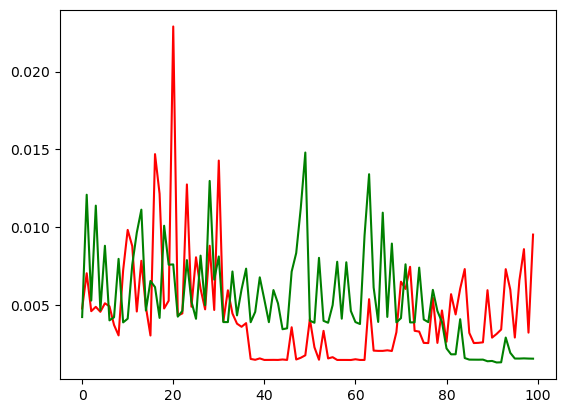

In [136]:
import matplotlib.pyplot as plt
L = [i for i in range(100)]
P_ython = [TimePy() for i in range(100)]
C_ython = [TimeCy() for i in range(100)]

print(len(L), len(P_ython))
plt.figure()
plt.plot(L, P_ython, color = "red")
plt.plot(L, C_ython, color = "green")

### Numba exercises

### Exercise 1

Previously we considered how to approximateby Monte Carlo.

- Use the same idea here, but make the code efficient using Numba.
- Compare speed with and without Numba when the sample size is large.

In [109]:
from numba import jit
import random

@jit
def monte_carlo_pi_Numba(nsamples):
    pi = 0.0
    circle_points = 0
    square_points = 0
    incre_interval = 0

    while incre_interval < nsamples:
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        d = x**2 + y**2
        if d <= 1:
            circle_points += 1
            square_points += 1
        elif d >= 1:
            square_points += 1
        incre_interval += 1

    pi = 4.0 * (circle_points / square_points)
    return pi

CarloNumba_start_time = time.perf_counter()
monte_carlo_pi_Numba(100000)
CarloNumba_end_time = time.perf_counter()
print(f"Start_time :{CarloNumba_start_time}")
print(f"End_time : {CarloNumba_end_time}")
print(f"Cython`s Execution time : {CarloNumba_end_time - CarloNumba_start_time}")
print()

C:\Users\HP\AppData\Local\Temp\ipykernel_14600\1628963441.py:4: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


Start_time :222033.8451457
End_time : 222034.1469281
Cython`s Execution time : 0.30178239999804646



### Exercise 2

In the [Introduction to Quantitative Economics](https://python.quantecon.org/intro.html) with Python lecture series you can learn all about finite-state Markov chains.

For now, let's just concentrate on simulating a very simple example of such a chain.

Suppose that the volatility of returns on an asset can be in one of two regimes — high or low.

The transition probabilities across states are as follows ![markov](../data/markov.png)

For example, let the period length be one day, and suppose the current state is high.

We see from the graph that the state tomorrow will be

- high with probability 0.8

- low with probability 0.2

Your task is to simulate a sequence of daily volatility states according to this rule.

Set the length of the sequence to `n = 1_000_000` and start in the high state.

Implement a pure Python version and a Numba version, and compare speeds.

To test your code, evaluate the fraction of time that the chain spends in the low state.

If your code is correct, it should be about 2/3.

Hints:

- Represent the low state as 0 and the high state as 1.

- If you want to store integers in a NumPy array and then apply JIT compilation, use `x = np.empty(n, dtype=np.int_)`.
